In [9]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
from numpy.lib.scimath import sqrt

In [2]:
sA = sp.Symbol('A')
sB = sp.Symbol('B')
sC = sp.Symbol('C')
sk1 = sp.Symbol('k1')
sk2 = sp.Symbol('k2')

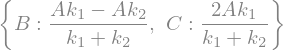

In [3]:
sp.solve((sA + sB - sC, sk1 * (sA - sB) - sk2 * sC), (sB, sC))

In [10]:
def k(E, V, m = 1, h = 1):
    return sqrt(2 * m * (E - V)) / h

In [4]:
def psiA(x, t, E, A):
    return A * np.exp(1j * k(E, 0) * x) * np.exp(-1j * E * t)

In [5]:
def psiB(x, t, E, A, V = 1):
    return A * (k(E, 0) - k(E, V)) / (k(E, 0) + k(E, V)) * np.exp(-1j * k(E, 0) * x) * np.exp(-1j * E * t)

In [6]:
def psiC(x, t, E, A, V = 1):
    return 2 * A * k(E, 0) * np.exp(1j * k(E, V) * x) / (k(E, 0) + k(E, V)) * np.exp(-1j * E * t)

In [20]:
fig = plt.figure()
ax = plt.axes(xlim = (-5, 5), ylim = (-3, 3))
plt.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
line3, = ax.plot([], [], lw = 2)
dt = 0.01
plt.close()

A = 1
E = 1.0000001

T = 2 * np.pi / E

lxs = np.linspace(-5, 0, 1000)
rxs = np.linspace(0, 5, 1000)

def animate(i):
    line1.set_data(lxs, psiA(lxs, dt * i, E, A).real)
    line2.set_data(lxs, psiB(lxs, dt * i, E, A).real)
    line3.set_data(rxs, psiC(rxs, dt * i, E, A).real)
    return line1, line2, line3

anim = animation.FuncAnimation(fig, animate, frames = int(T / dt), interval=20, blit=True)
HTML(anim.to_html5_video())

In [21]:
def coswave(x, t, k, w):
    return np.cos(k * x - w(k) * t)

$$v_g = \frac{\partial \omega}{\partial{k}} $$

In [26]:
fig = plt.figure()
ax = plt.axes(xlim = (-10, 10), ylim = (-4, 4))
ax.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)

dt = 0.01

plt.close()

xs = np.linspace(-11, 11, 1000)

w = lambda k: k**2

def animate(i):
    
    line1.set_data(xs, coswave(xs, dt * i, 8, w) + coswave(xs, dt * i, 9, w) + coswave(xs, dt * i, 10, w))
    return line1, 

anim = animation.FuncAnimation(fig, animate, 800, interval=20, blit=True)
HTML(anim.to_html5_video())

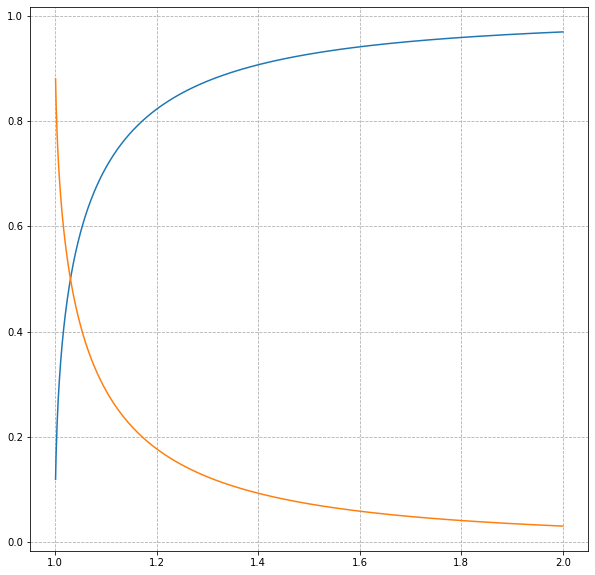

In [30]:
Es = np.linspace(1.001, 2, 1000)
plt.figure(figsize = (10, 10))
plt.grid(ls = '--')
plt.plot(Es, 4 * k(Es, 0) * k(Es, 1) / (k(Es, 0) + k(Es, 1))**2)
plt.plot(Es, (k(Es, 0) - k(Es, 1))**2 / (k(Es, 0) + k(Es, 1))**2)

In [13]:
sA = sp.Symbol('A')
sx = sp.Symbol('x', real = True)
sk = sp.Symbol('k', real = True)
sw = sp.Symbol('omega', real = True)
st = sp.Symbol('t', real = True)
sh = sp.Symbol('hbar')
sm = sp.Symbol('m')

In [42]:
def j(sPsi):
    return sh / (2 * sm * sp.I) * (sPsi.conjugate() * sPsi.diff(sx) - sPsi.conjugate().diff(sx) * sPsi)

In [52]:
Psi = sA * sp.exp(sp.I * sk * sx - sp.I * sw * st)
Psi

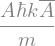

In [53]:
j(Psi).simplify()

In [12]:
fig = plt.figure()
ax = plt.axes(xlim = (-5, 5), ylim = (-3, 3))
plt.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
line3, = ax.plot([], [], lw = 2)
dt = 0.01
plt.close()

A = 1
E = 0.5

T = 2 * np.pi / E

lxs = np.linspace(-5, 0, 1000)
rxs = np.linspace(0, 5, 1000)

def animate(i):
    line1.set_data(lxs, psiA(lxs, dt * i, E, A).real)
    line2.set_data(lxs, psiB(lxs, dt * i, E, A).real)
    line3.set_data(rxs, psiC(rxs, dt * i, E, A).real)
    return line1, line2, line3

anim = animation.FuncAnimation(fig, animate, frames = int(T / dt), interval=20, blit=True)
HTML(anim.to_html5_video())

In [14]:
sA = sp.Symbol('A')
sx = sp.Symbol('x', real = True)
sk = sp.Symbol('k', real = True)
sw = sp.Symbol('omega', real = True)
st = sp.Symbol('t', real = True)
sh = sp.Symbol('hbar')
sm = sp.Symbol('m')

In [15]:
def j(sPsi):
    return sh / (2 * sm * sp.I) * (sPsi.conjugate() * sPsi.diff(sx) - sPsi.conjugate().diff(sx) * sPsi)

In [16]:
Psi = sA * sp.exp(sk * sx - sp.I * sw * st)
Psi

In [17]:
j(Psi).simplify()

In [24]:
sA = sp.Symbol('A')
sB = sp.Symbol('B')
sC = sp.Symbol('C')
sk1 = sp.Symbol('k1', real = True)
sk2 = sp.Symbol('k2', real = True)

In [25]:
(sp.Abs(sp.solve((sA + sB - sC, sp.I * sk1 * (sA - sB) + sk2 * sC), (sB, sC))[sB])**2).simplify()